In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import html
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [75]:
train_path ='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
test_path = 'https://raw.githubusercontent.com/gurkpet/Thinkful-Lessons/8b1bfca035fc0505813326ee7ceb370d514e1884/Thinkful%202.5.1%20-%20Test%20Statistics/Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.txt'
train_data = pd.read_csv(train_path, skiprows=4, skipfooter=3, engine='python', thousands=",")
test_data = pd.DataFrame()
test_data = pd.read_table(test_path, skiprows=0, skipfooter=7, engine='python', thousands=",")

test_data.drop(test_data.columns[len(test_data.columns)-1], axis=1, inplace=True)

In [76]:
train_data = train_data.drop('Rape\n(revised\ndefinition)1', 1)
test_data = test_data.drop('Rape\n(revised\ndefinition)1', 1)

In [77]:
train_data = train_data.fillna(train_data.median(), inplace = True)
test_data = test_data.fillna(test_data.median(), inplace = True)

In [78]:
column_heads= ['City',
               'Population',
              'Violent_Crime',
               'Murder',
               'Rape',
               'Robbery',
               'Aggravated_Assult',
               'Property_Crime',
               'Burglary',
               'Larceny_Theft',
               'Motor_Vehicle_Theft',
               'Arson'
              ]

In [79]:
train_data.columns = [column_heads]
test_data.columns = [column_heads]

In [80]:
(test_data.isnull().sum()/len(test_data))*100

City                   0.0
Population             0.0
Violent_Crime          0.0
Murder                 0.0
Rape                   0.0
Robbery                0.0
Aggravated_Assult      0.0
Property_Crime         0.0
Burglary               0.0
Larceny_Theft          0.0
Motor_Vehicle_Theft    0.0
Arson                  0.0
dtype: float64

In [81]:
(train_data.isnull().sum()/len(train_data))*100

City                   0.0
Population             0.0
Violent_Crime          0.0
Murder                 0.0
Rape                   0.0
Robbery                0.0
Aggravated_Assult      0.0
Property_Crime         0.0
Burglary               0.0
Larceny_Theft          0.0
Motor_Vehicle_Theft    0.0
Arson                  0.0
dtype: float64

In [83]:
test_data['City'] = test_data.City.str.strip('5 4,')
test_data = test_data.dropna()

In [85]:
train_data.Population.nlargest(5)

216    8396126
35      258789
272     210562
346     199134
310     143834
Name: Population, dtype: int64

In [104]:
train_data_model = train_data_model.drop(train_data_model[train_data_model.Population >= 143834].index)
test_data_model = test_data_model.drop(test_data_model[test_data_model.Population >= 143834].index)

In [105]:
train_data.Population.nlargest(5)

7      118296
3       97956
126     96667
267     87204
57      80705
Name: Population, dtype: int64

In [106]:
column_heads

['City',
 'Population',
 'Violent_Crime',
 'Murder',
 'Rape',
 'Robbery',
 'Aggravated_Assult',
 'Property_Crime',
 'Burglary',
 'Larceny_Theft',
 'Motor_Vehicle_Theft',
 'Arson']

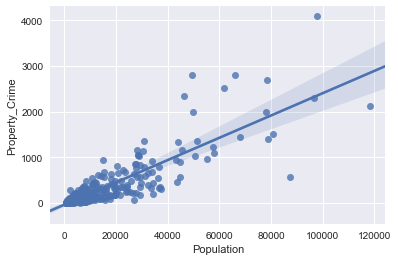

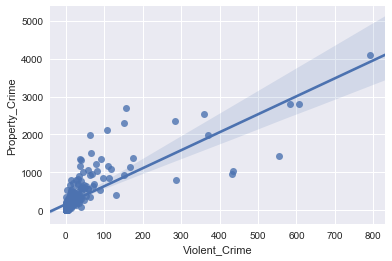

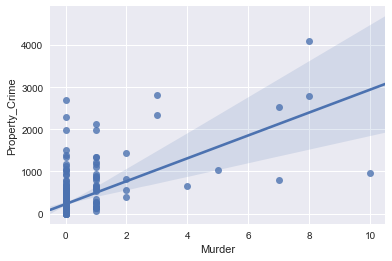

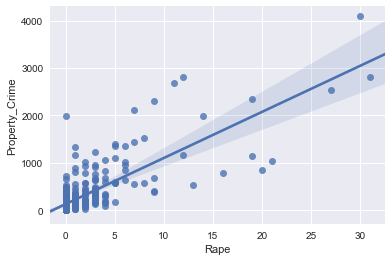

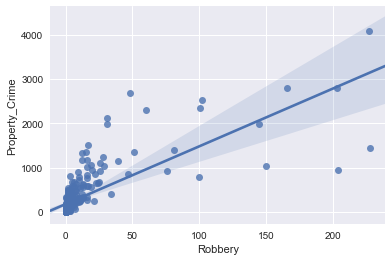

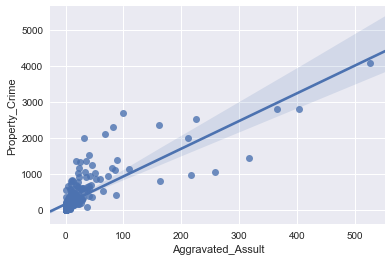

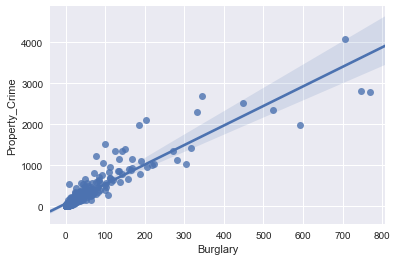

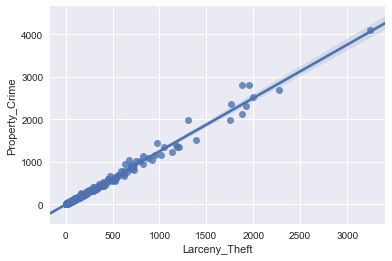

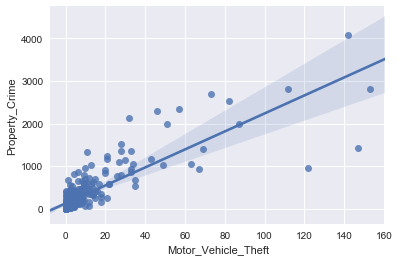

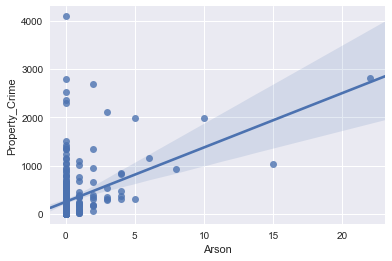

In [111]:
sns.regplot(train_data['Population'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Violent_Crime'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Murder'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Rape'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Robbery'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Aggravated_Assult'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Burglary'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Larceny_Theft'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Motor_Vehicle_Theft'], train_data['Property_Crime'])
plt.show()
sns.regplot(train_data['Arson'], train_data['Property_Crime'])
plt.show()

In [126]:
train_model_data = train_data[['Population', 'Burglary', 'Larceny_Theft']]
train_model_target = train_data[['Property_Crime']].values.reshape(-1, 1)

In [127]:
regr.fit(train_model_data, train_model_target)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(train_model_data, train_model_target))


Coefficients: 
 [[ 1.16004097  1.00587395]]

Intercept: 
 [-0.88070452]

R-squared:
0.999645883307


In [130]:
test_model_data = test_data[['Population', 'Burglary', 'Larceny_Theft']]
regr.predict(test_model_data)

ValueError: shapes (369,3) and (2,1) not aligned: 3 (dim 1) != 2 (dim 0)